In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rn
from scipy import signal 
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


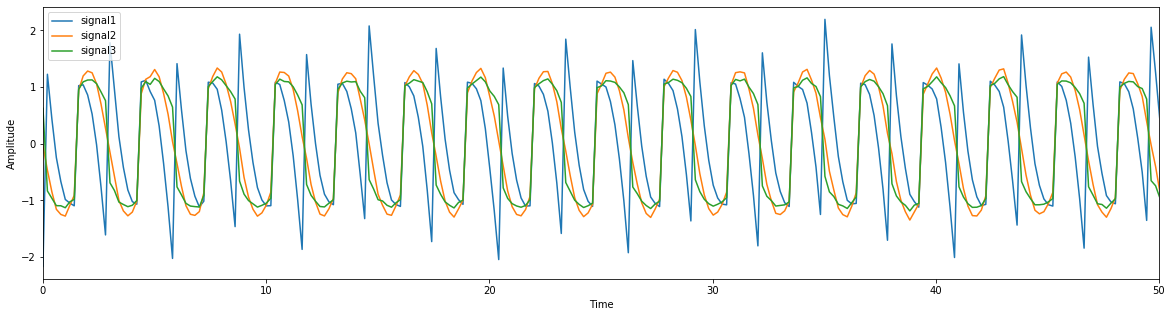

In [36]:
T=200
fs = 1000
t=np.linspace(0,T,fs)

sinusSignal=np.sin(500*t)
sawtoothSignal=signal.sawtooth(500*t)
squareSignal=signal.square(500*t)

#generating signals
noise=np.random.normal(0,0.5,1000).reshape(-1,1)*0.05
signal1=(0.2*sinusSignal) + (0.2*squareSignal) + (0.6*sawtoothSignal) 
signal2=(0.33*sinusSignal) + (0.33*squareSignal) + (0.34*sawtoothSignal) 
signal3=(0.2*sinusSignal) + (0.6*squareSignal) + (0.2*sawtoothSignal) 

sc=StandardScaler()

signal1=sc.fit_transform(signal1.reshape(-1,1)) + noise
signal2=sc.fit_transform(signal2.reshape(-1,1)) + noise
signal3=sc.fit_transform(signal3.reshape(-1,1)) + noise

plt.figure(figsize=(20,5))
plt.plot(t,signal1,t,signal2,t,signal3)
plt.legend(['signal1','signal2','signal3'])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0,50)
plt.show()

### PCA

In [40]:
pca=PCA(n_components=3,random_state=0)
X_pca=pca.fit_transform(np.hstack((signal1,signal2,signal3)))
signal1_pca=X_pca[:,0]
signal2_pca=X_pca[:,1]
signal3_pca=X_pca[:,2]

#calculating explained variances
pcaScores=np.array([explained_variance_score(signal1,signal1_pca),explained_variance_score(signal2,signal2_pca),explained_variance_score(signal3,signal3_pca)])

### ICA

In [42]:
ica=FastICA(n_components=3,random_state=0)
X_ica=ica.fit_transform(np.hstack((signal1,signal2,signal3)))
signal1_ica=X_ica[:,0]
signal2_ica=X_ica[:,1]
signal3_ica=X_ica[:,2]

#calculating explained variances
icaScores=np.array([explained_variance_score(signal1,signal1_ica),explained_variance_score(signal2,signal2_ica),explained_variance_score(signal3,signal3_ica)])

/home/saqib/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [46]:
print( " The PCA expalined variances are ", pcaScores, "and the ICA scores are ",icaScores, "for signal1, signal2, and signal3 respectively")

 The PCA expalined variances are  [-0.46763099 -0.53704236 -0.01313423] and the ICA scores are  [0.00313716 0.04702776 0.03832438] for signal1, signal2, and signal3 respectively


We can see that the ICA score is better for every signal and hence we can conclude that ICA decomposes the signal better than PCA. This is because the ICA tries to maximize the non-Gaussianity of the components, which is a property of independent signals (which is the case here). On the other hand, PCA tries to maximize the variance of the components.